In [1]:
import numpy as np
import tqdm 
import osyris
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import interpolate
import sys

sys.path.append('../my_funcs/')
from pipeline_main import pipeline, dist
from pipeline_streamers import phi_average

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

ModuleNotFoundError: No module named 'pipeline_streamers'

In [3]:
data = pipeline(snap = 535, run = 'sink178core03', sink_id=178)
#data = pipeline(snap = 710, run = 'my_core_13restart')
data.recalc_L(verbose = 1); 

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4855/4855 [00:14<00:00, 328.46it/s]


Converged mean angular momentum vector after 0 iteration(s)


Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4855/4855 [00:00<00:00, 11728.57it/s]


Disk size: 145.1 au


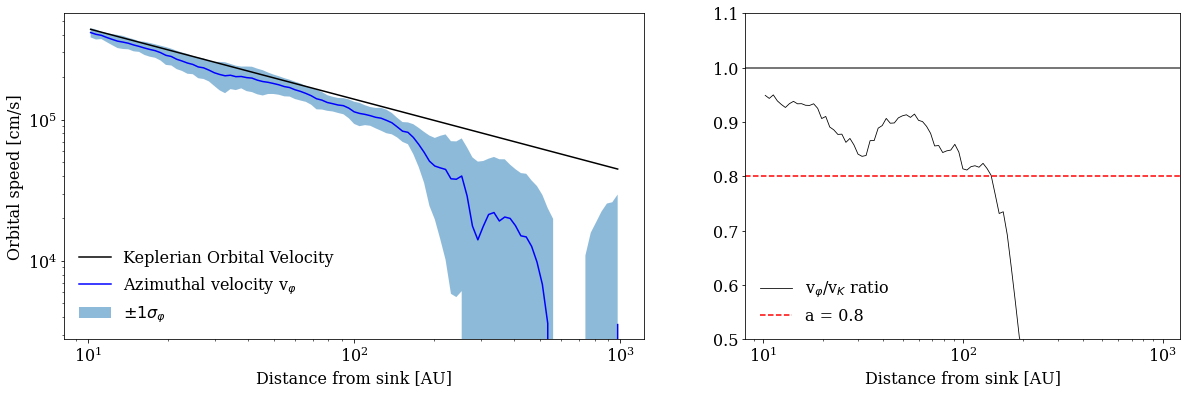

In [4]:
data.calc_disksize()

TypeError: cannot unpack non-iterable NoneType object

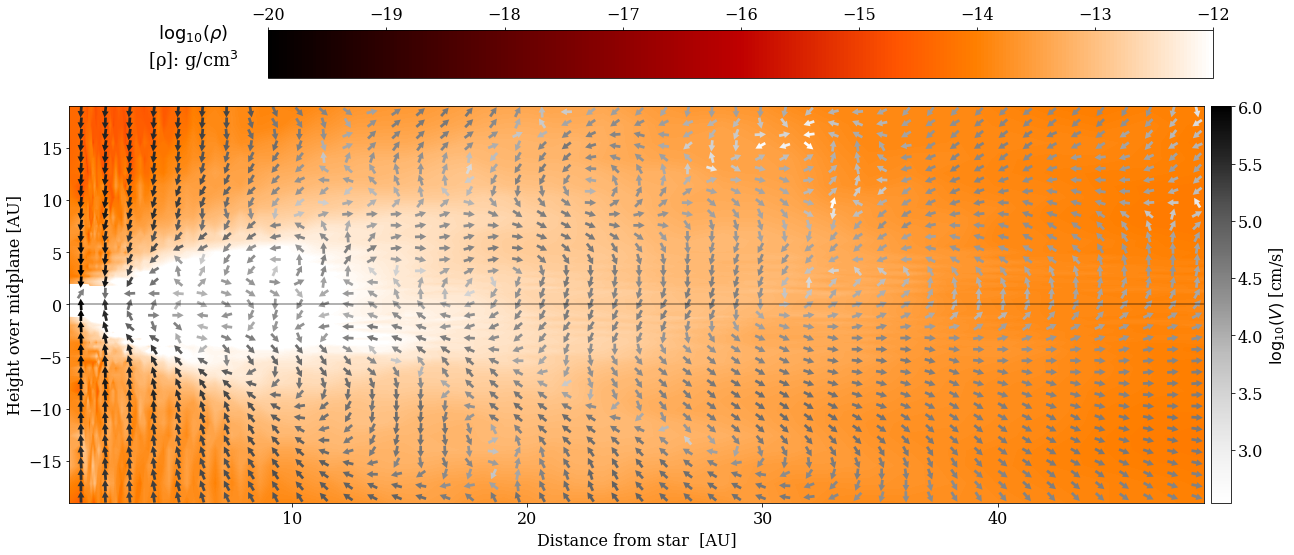

In [12]:
R, z, val = data.phiaverage()

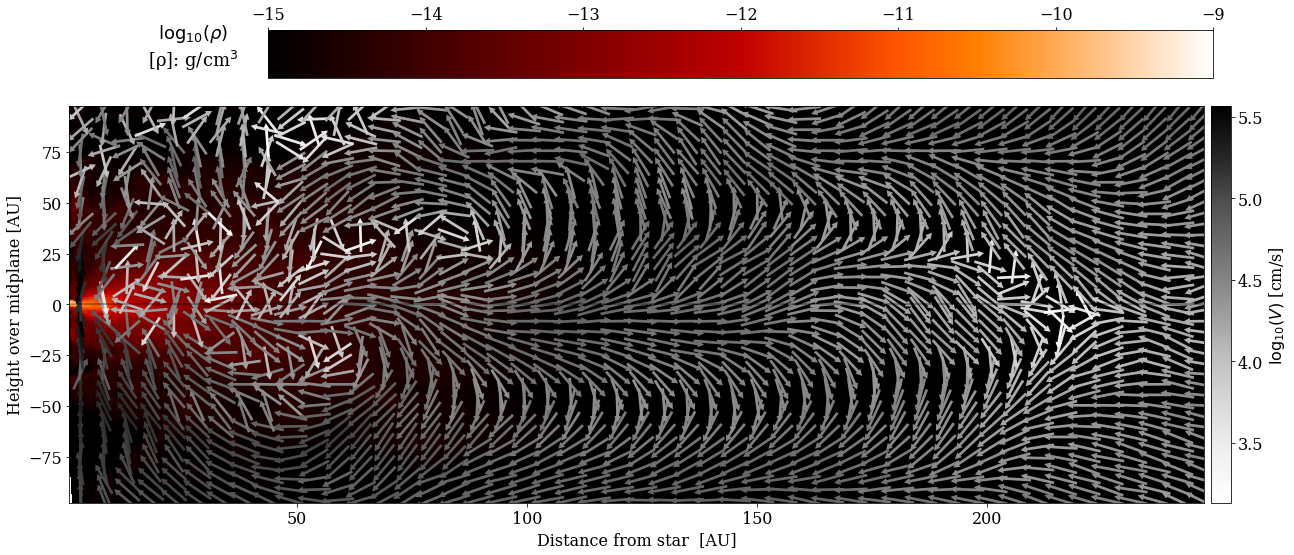

In [14]:
R, z, val = data.phiaverage(ivs = 'd', radius = 250, height=100, NR = 250, Nh_half=100, quiver_dens=0.2, log_vmin = -15, log_vmax = -9)

In [9]:
np.log10(val).min()

5.056291607738046

[Text(0.5, 1.0, 'Pressure')]

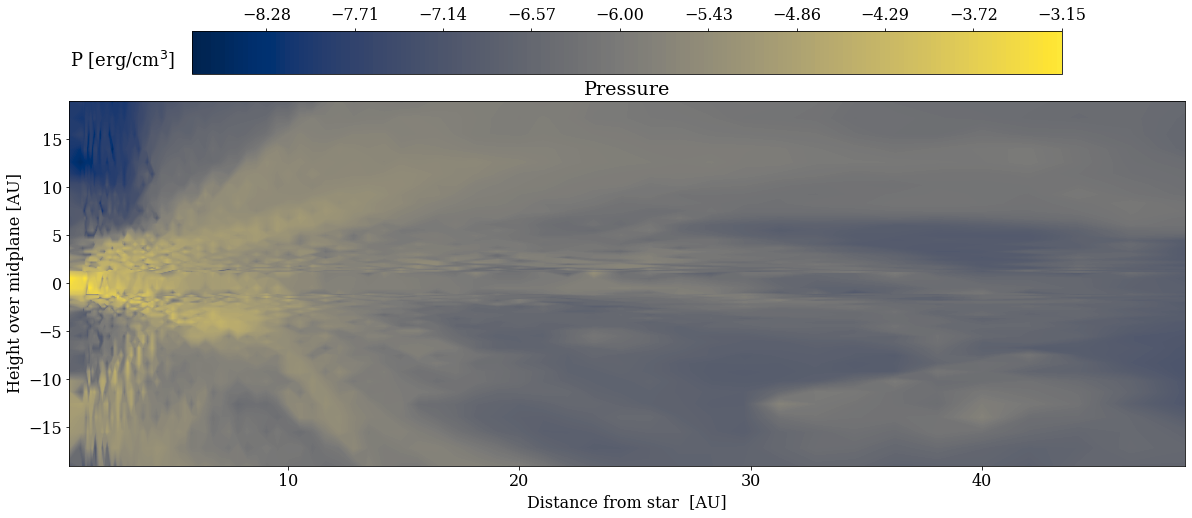

In [5]:
fig, axs = plt.subplots(figsize = (20,8))
cs = axs.contourf(R * data.au_length, z*data.au_length, np.log10(val.T * data.cgs_pressure), origin = 'lower', levels = 200, cmap = 'cividis')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.1, pad = 0.06, location = 'top');
cbar.set_label('P [erg/cm$^3$]', labelpad = -60, x = -0.08, rotation = 0, fontsize = 18)
axs.set(ylabel = 'Height over midplane [AU]', xlabel = 'Distance from star  [AU]');
axs.set(title='Pressure')

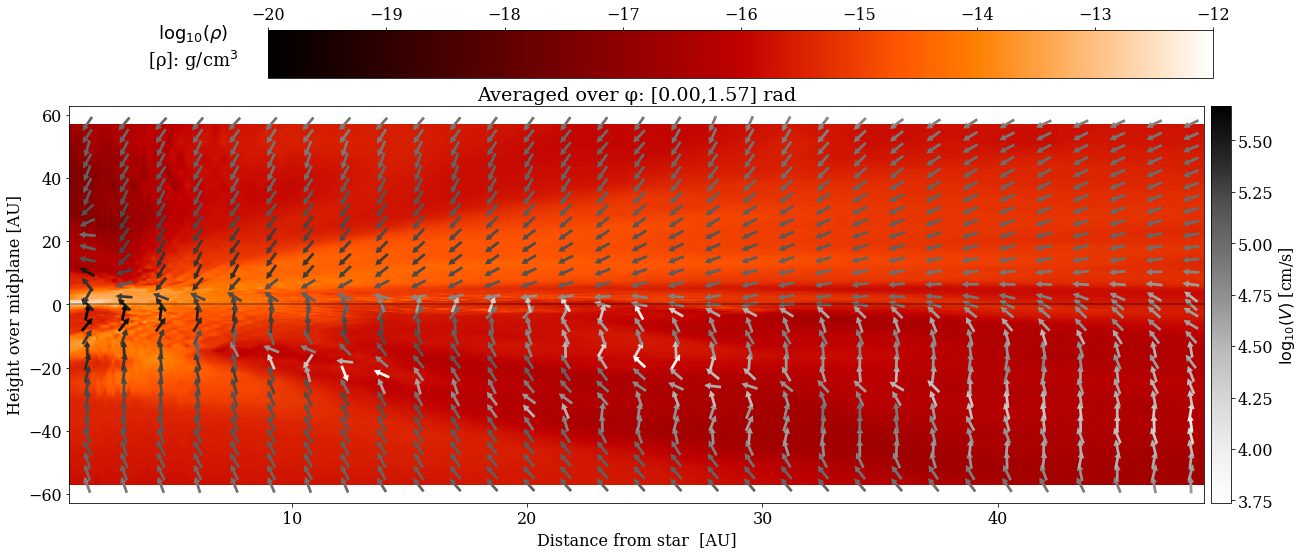

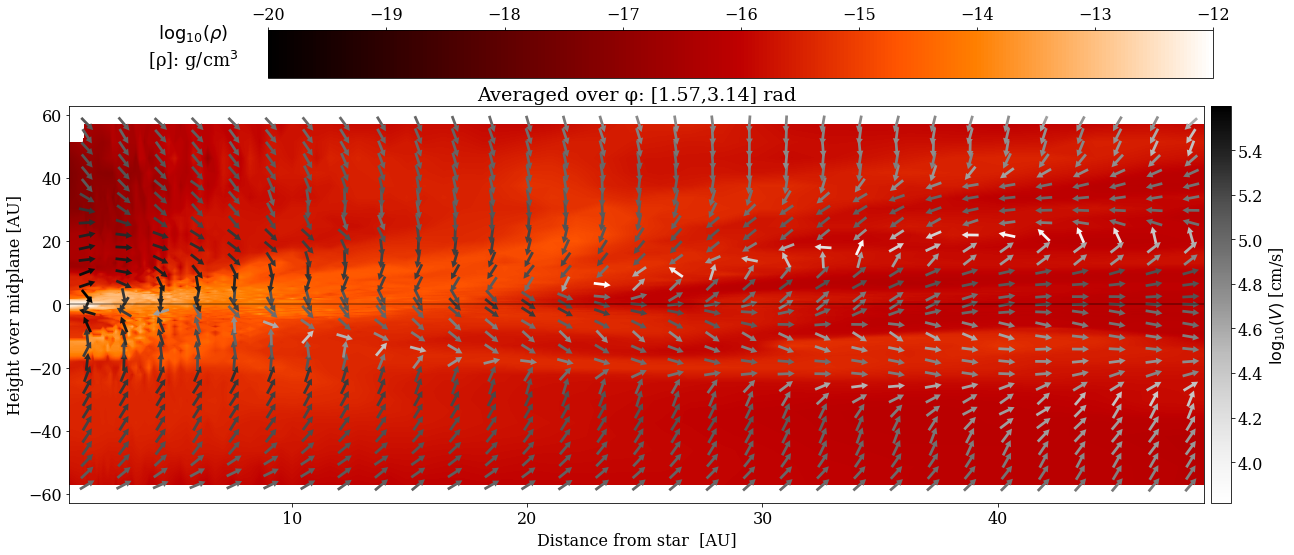

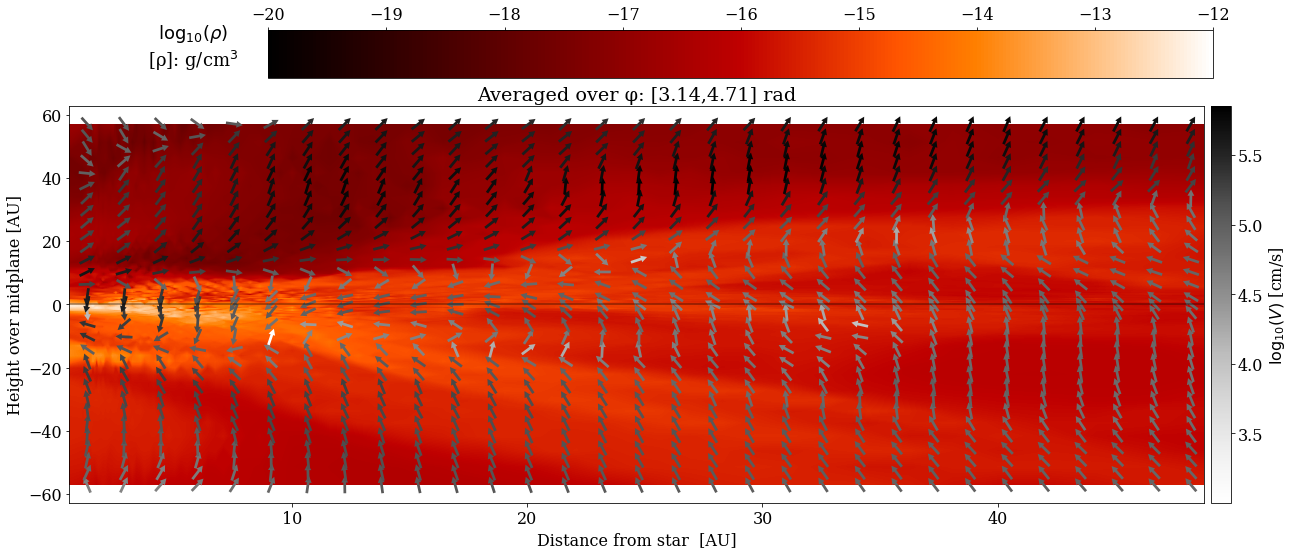

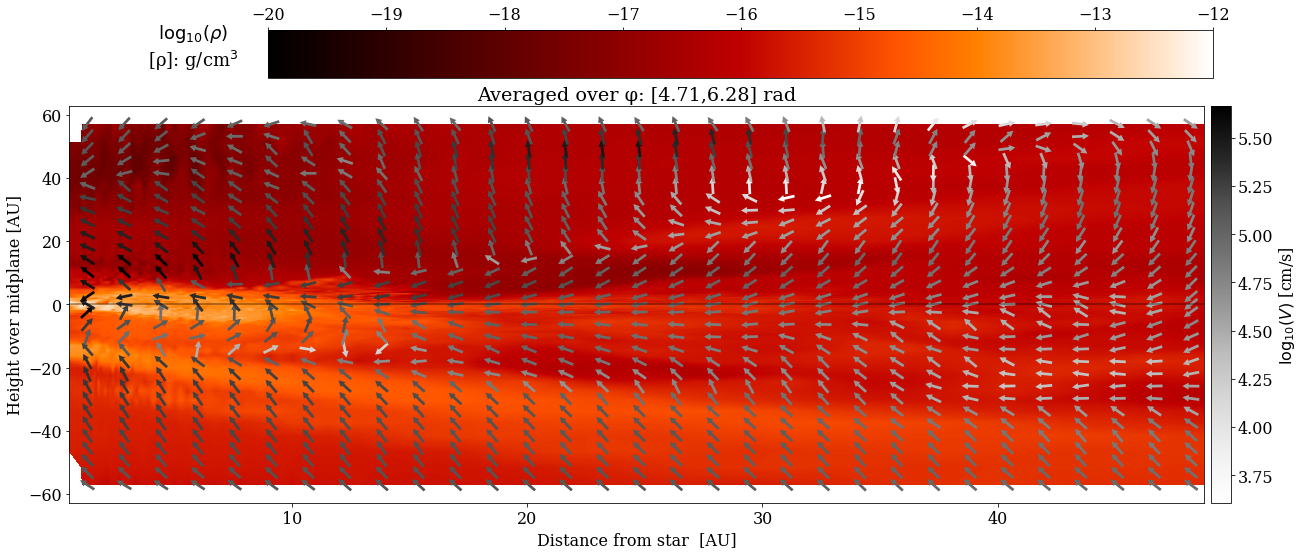

In [17]:
data.phiaverage(phi_extent=[0, 0.5*np.pi], height=60, Nh_half=40, quiver_dens=0.4)
data.phiaverage(phi_extent=[0.5*np.pi, np.pi], height=60, Nh_half=40, quiver_dens=0.4)
data.phiaverage(phi_extent=[np.pi, 3*np.pi/2], height=60, Nh_half=40, quiver_dens=0.4)
data.phiaverage(phi_extent=[ 3*np.pi/2, 2*np.pi], height=60, Nh_half=40, quiver_dens=0.4)

In [7]:
10**(0.5)

3.1622776601683795